## Facial landmark detector with dlib
Reference: 
* https://www.pyimagesearch.com/2018/04/02/faster-facial-landmark-detector-with-dlib/
* https://towardsdatascience.com/facial-mapping-landmarks-with-dlib-python-160abcf7d672
* https://www.pyimagesearch.com/2017/04/03/facial-landmarks-dlib-opencv-python/

* While the 68-point detector localizes regions along the eyes, eyebrows, nose, mouth, and jawline, the 5-point facial landmark detector reduces this information to:
  * 2 points for the left eye
  * 2 points for the right eye
  * 1 point for the nose

* Detecting facial landmarks in an image is a two step process:
  1. First we must localize a face(s) in an image. This can be accomplished using a number of different techniques, but normally involve either Haar cascades or HOG + Linear SVM detectors (but any approach that produces a bounding box around the face will suffice).
  2. Apply the shape predictor, specifically a facial landmark detector, to obtain the (x, y)-coordinates of the face regions in the face ROI.

* Given these facial landmarks we can apply a number of computer vision techniques, including:
  * Face part extraction (i.e., nose, eyes, mouth, jawline, etc.)
  * Facial alignment
  * Head pose estimation
  * Face swapping
  * Blink detection

In [0]:
!wget https://github.com/JeffTrain/selfie/raw/master/shape_predictor_68_face_landmarks.dat

In [0]:
from imutils import face_utils
import dlib
import cv2
import numpy as np
import urllib.request 
from google.colab.patches import cv2_imshow


urls = [
  'https://user-images.githubusercontent.com/15984084/69748275-feabc980-116d-11ea-845a-6fef3ef1916b.jpg',
  'https://user-images.githubusercontent.com/15984084/69748276-feabc980-116d-11ea-9142-7c4f1889a7e3.jpg',
  'https://user-images.githubusercontent.com/15984084/69748281-ff446000-116d-11ea-867f-636696b5176f.jpg']

def url_to_image(url):
	resp = urllib.request.urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
	return image

In [0]:
# initialize dlib's face detector (HOG-based) and then create
# the facial landmark predictor
p = "/content/shape_predictor_68_face_landmarks.dat.2"
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(p)

def landMarkDetection(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
    # detect faces in the grayscale image
    rects = detector(gray, 0)
    
    # loop over the face detections
    for (i, rect) in enumerate(rects):
        # determine the facial landmarks for the face region, then
        # convert the facial landmark (x, y)-coordinates to a NumPy
        # array
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)

        # convert dlib's rectangle to a OpenCV-style bounding box
        # [i.e., (x, y, w, h)], then draw the face bounding box
        (x, y, w, h) = face_utils.rect_to_bb(rect)
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # loop over the (x, y)-coordinates for the facial landmarks
        # and draw them on the image
        for (x, y) in shape:
            cv2.circle(image, (x, y), 2, (0, 0, 255), -1)
    
    # show the output image with the face detections + facial landmarks
    # cv2.imshow("Output", image)
    cv2_imshow(image)

cv2.destroyAllWindows()


org image size =  (207, 243, 3)
resized image size =  (200, 200, 3)


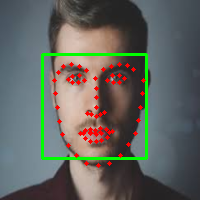

--------------------------
org image size =  (1500, 1000, 3)
resized image size =  (200, 200, 3)


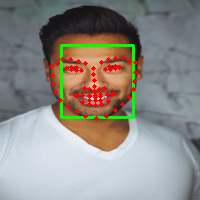

--------------------------
org image size =  (533, 799, 3)
resized image size =  (200, 200, 3)


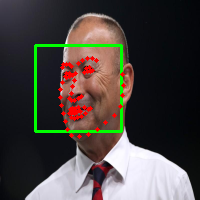

--------------------------


In [26]:
for each in urls:
  image = url_to_image(each)
  print("org image size = ", image.shape)
  dim = (200, 200)
  image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
  print("resized image size = ", image.shape)

  if image is None:
      print("Could not read input image")
  landMarkDetection(image)
  print("--------------------------")